## RK4 Method

Let an IVP be specified as follows:

$$\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0.$$

Then, the RK4 method is 
$$
\begin{align}
y_{n+1} &= y_n + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)h,\\
t_{n+1} &= t_n + h \\
\end{align}
$$
where
$$
\begin{align}
 k_1 &= \ f(t_n, y_n), \\
 k_2 &= \ f\!\left(t_n + \frac{h}{2}, y_n + h\frac{k_1}{2}\right), \\ 
 k_3 &= \ f\!\left(t_n + \frac{h}{2}, y_n + h\frac{k_2}{2}\right), \\
 k_4 &= \ f\!\left(t_n + h, y_n + hk_3\right).
 \end{align}
$$


Here $y_{n+1}$ is the RK4 approximation of $y(t_{n+1})$, and the next value ($y_{n+1}$) is determined by the present value ($y_n$) plus the weighted average of four increments, where each increment is the product of the size of the interval, ''h'', and an estimated slope specified by function ''f'' on the right-hand side of the differential equation.

In averaging the four slopes, greater weight is given to the slopes at the midpoint. If $f$ is independent of $y$, so that the differential equation is equivalent to a simple integral, then RK4 is Simpson's rule.

## Problem

Consider $y' = y- t^2 + 1$ with $y(0) = 0.5$. The exact solution is $y = t^2 + 2t + 1 -\frac{1}{2} e^t$.

1. Write a code for the RK4 to find y(1).
2. Let's verify the order of Heun's method experimentally by plotting the "local truncation error" for RK4 applied to the underlying equation. Use loglog plot to see the convergence.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
f = lambda t,y : y - t**2 + 1
h = 0.1, 0.05, 0.025, 0.01
exact = lambda t: t**2 + 2*t +1 -0.5 * np.exp(t)

In [12]:
def RK4(f, y0, t0, tf, h):
    N = int((tf - t0)/h)
    x = np.linspace(t0, tf, N+1)
    y = np.zeros_like(x)
    y[0] = y0
    for i in range(len(x)-1):
        k1 = f(x[i],y[i])
        k2 = f(x[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(x[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(x[i] + h, y[i] + h*k3)
        y[i+1] = y[i] + h*(k1+2*k2+2*k3+k4)/6

    return x, y

In [13]:
grid, approx = RK4(f, 0.5, 0, 1, 0.1)
print(approx[-1])
print(exact(1))

2.640856724185053
2.6408590857704777


In [10]:
def odeHeun(f, t, y0):
    y = np.zeros(len(t))
    y[0]=y0
    for n in range(0, len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n+1], y[n]+k1*h)
        y[n+1] = y[n] + (k1+k2)/2*h
    return y

In [14]:
heun = odeHeun(f, grid, 0.5)

In [15]:
print(heun[-1])

2.6347972869501346


[1.65962176e-07 5.19740462e-09 1.66600067e-12 5.20694599e-14
 1.11022302e-16]


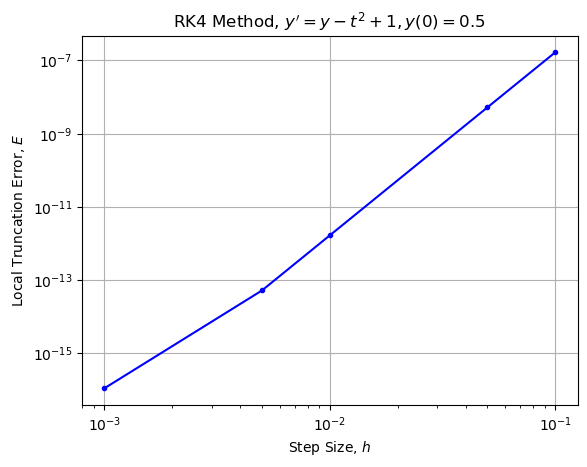

4.996919291841246
4.998943208367904
4.999807730386747
3.821584368634736


In [19]:
y0 = 0.5;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    _,y = RK4(f, y0, 0, 1,h[n])
    t = h[n]
    y1 = y[1]
    y1_exact = t**2 + 2*t +1 -0.5 * np.exp(t)
    E[n] = np.abs(y1_exact - y1)
print(E)
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("RK4 Method, $y'=y-t^{2}+1,y(0)=0.5$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j]))/(np.log(h[j+1]) - np.log(h[j])))